In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import matplotlib.patches as mpatches

%matplotlib inline
plt.style.use('seaborn-whitegrid')

df = pd.read_excel(r'ShopSatisfactionSurveyData.xlsx')

In [2]:
df.columns = ['H', 'gender', 'age', 'family_size', 'house', 'education', 'net_income', 'purchases', 'sat_product_range', 'sat_price_level']
df.head()

,H,gender,age,family_size,house,education,net_income,purchases,sat_product_range,sat_price_level
0,1,1,34,4,1,4,2960.0,4.0,3,2
1,2,1,67,1,1,1,980.0,1.0,5,2
2,3,2,46,3,3,5,3500.0,4.0,2,4
3,4,1,22,2,2,3,860.0,1.0,5,3
4,5,2,30,5,2,4,3380.0,4.0,2,3


In [3]:
df1 = pd.crosstab(df['family_size'], 'Count')
df1['%'] = df1['Count'] / df1['Count'].sum() * 100
df1.columns.name = ''
df1

,Count,%
family_size,,
1,30,29.411765
2,25,24.509804
3,15,14.705882
4,16,15.686275
5,10,9.803922
6,5,4.901961
7,1,0.980392


Text(0.5, 0, 'Size of the family(person)')

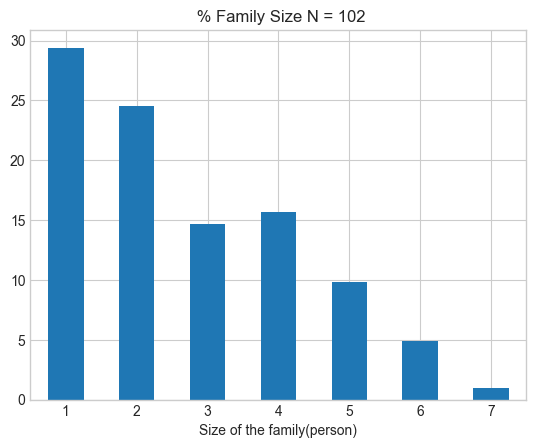

In [4]:
df1['%'].plot.bar(rot = 0)
plt.title(" % Family Size N = "+ str(df1['Count'].sum()))
plt.xlabel('Size of the family(person)')



Text(0, 0.5, '€/month\n\n 1 = less than 250\n\n 2 = 250 - 499\n\n 3 = 500 - 749\n\n 4 = 750 - 999 \n\n 5 = 1 000+')

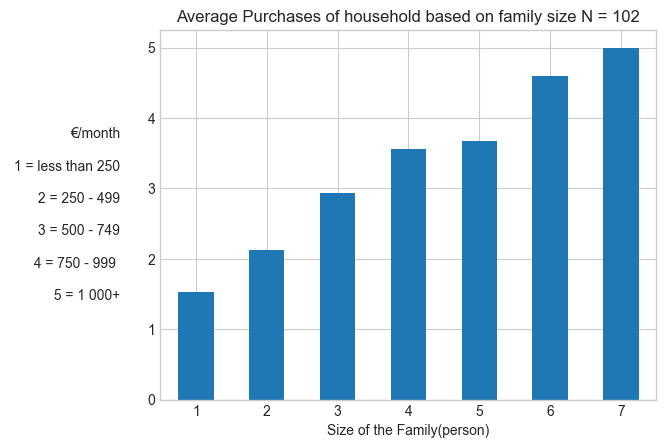

In [5]:
df2 = df.groupby('family_size')['purchases'].mean()
df2.plot.bar(rot = 0)
plt.title('Average Purchases of household based on family size N = 102')
plt.xlabel('Size of the Family(person)')
plt.ylabel('€/month\n\n 1 = less than 250\n\n 2 = 250 - 499\n\n 3 = 500 - 749\n\n 4 = 750 - 999 \n\n 5 = 1 000+', rotation = 'horizontal', ha ='right', va='center',labelpad=20 )


In [6]:

df3 = pd.crosstab(df['purchases'], 'Count')
df3['%'] = df3['Count'] / df3['Count'].sum() * 100
df3.index = ['>250', '250-499', '500-749', '750-999','1000+']
df3



col_0,Count,%
>250,17,16.831683
250-499,39,38.613861
500-749,20,19.801980
750-999,19,18.811881
1000+,6,5.940594


Text(0.5, 0, '%')

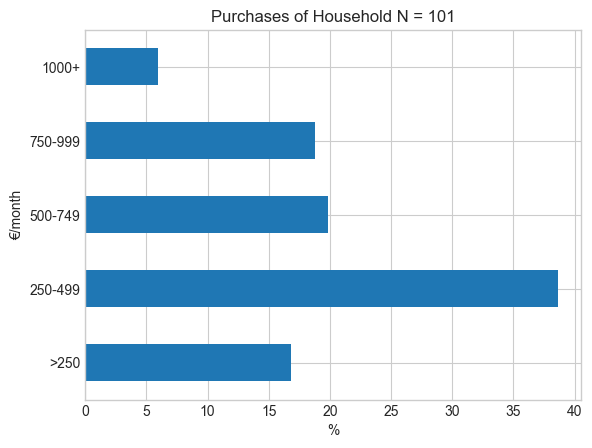

In [7]:
df3['%'].plot.barh()
plt.title('Purchases of Household N = ' + str(df3['Count'].sum()))
plt.ylabel('€/month')
plt.xlabel('%')

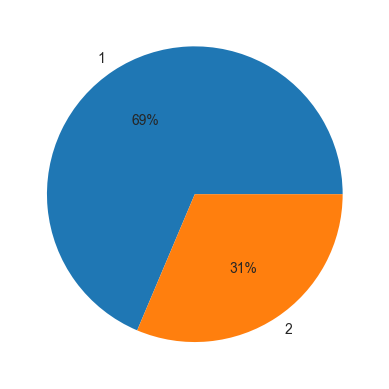

In [8]:
df4 = pd.crosstab(df['gender'], 'Count')
df4['%'] = df4['Count'] / df4['Count'].sum() * 100
df4.plot.pie(y=0, autopct='%1.0f%%')
plt.ylabel('')
plt.legend('')

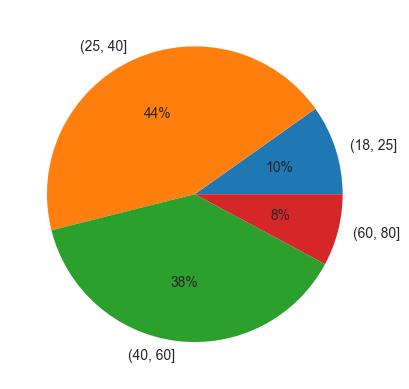

In [9]:
bins = [18, 25, 40, 60, 80, 100]
df['age_class'] = pd.cut(df['age'], bins=bins)
df4 = pd.crosstab(df['age_class'], 'Count')
df4['%'] = df4['Count'] / df4['Count'].sum() * 100
df4.plot.pie(y=0, autopct='%1.0f%%')
plt.ylabel('')
plt.legend('')

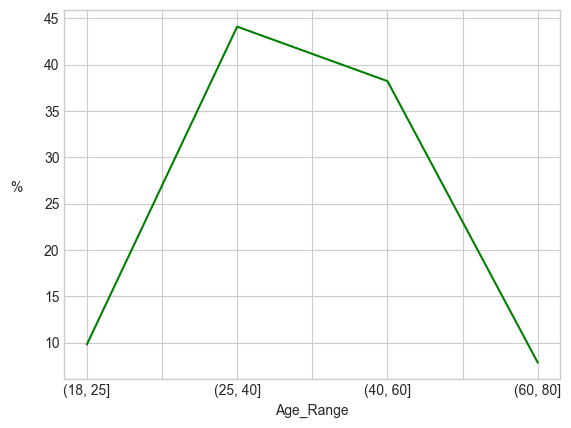

In [10]:
df4['%'].plot.line(color = "Green")
plt.ylabel('%',labelpad=20,rotation = 0)
plt.xlabel('Age_Range')
plt.legend('')

Text(0.5, 0, '(€) Net Income')

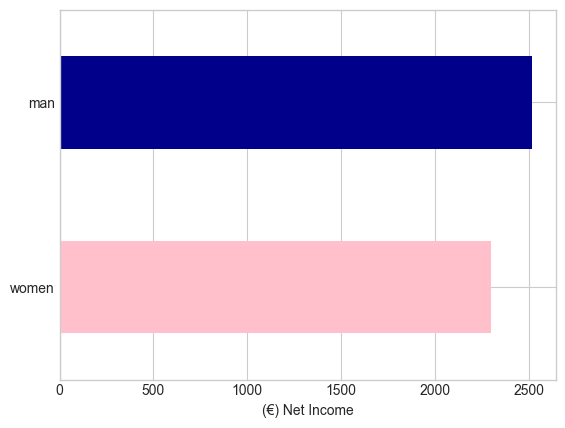

In [11]:
df6 = df.groupby('gender')['net_income'].mean()
df6.index=['women','man']
df6.plot.barh(color=['pink','darkblue'])
plt.xlabel('(€) Net Income')

Text(0.5, 0, 'sat_price_level')

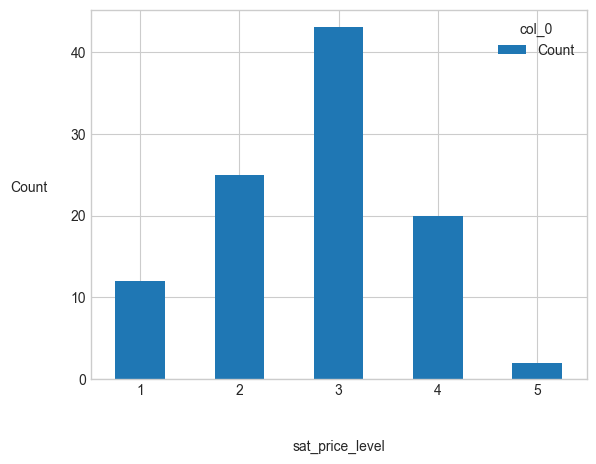

In [12]:
df3 = pd.crosstab(df['sat_price_level'], 'Count') 
df3
df1=pd.crosstab(df['sat_price_level'], 'Count') 
df1.index=['1', '2', '3', '4', '5'] 
df1.plot.bar(rot = 0) 
plt.ylabel('Count', rotation= 'horizontal', labelpad=30) 
plt.xlabel('sat_price_level', rotation= 'horizontal', labelpad=30)

Text(0, 0.5, '€ Net Income')

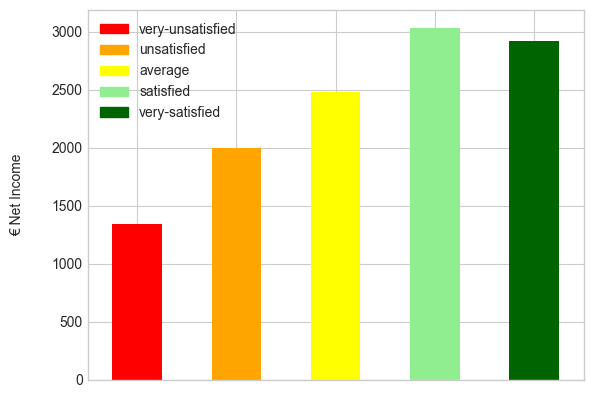

In [13]:
df8 = df.groupby('sat_price_level')['net_income'].mean()
df8.index = ['','','','','']
df8.plot.bar(color = ['red','orange','yellow','lightgreen','darkgreen'], legend = True)
vunsatisfied = mpatches.Patch(color = 'red', label='very-unsatisfied')
unsatisfied = mpatches.Patch(color = 'orange', label='unsatisfied')
average = mpatches.Patch(color = 'yellow', label = 'average')
satisfied = mpatches.Patch(color = 'lightgreen', label = 'satisfied')
vsatisfied = mpatches.Patch(color='darkgreen', label='very-satisfied')
plt.legend(handles = [vunsatisfied,unsatisfied,average,satisfied,vsatisfied], loc=2)

plt.ylabel('€ Net Income', rotation= 'vertical', labelpad=20)


array([[<AxesSubplot:ylabel='(18, 25]'>, <AxesSubplot:ylabel='(25, 40]'>],
       [<AxesSubplot:ylabel='(40, 60]'>, <AxesSubplot:ylabel='(60, 80]'>]],
      dtype=object)

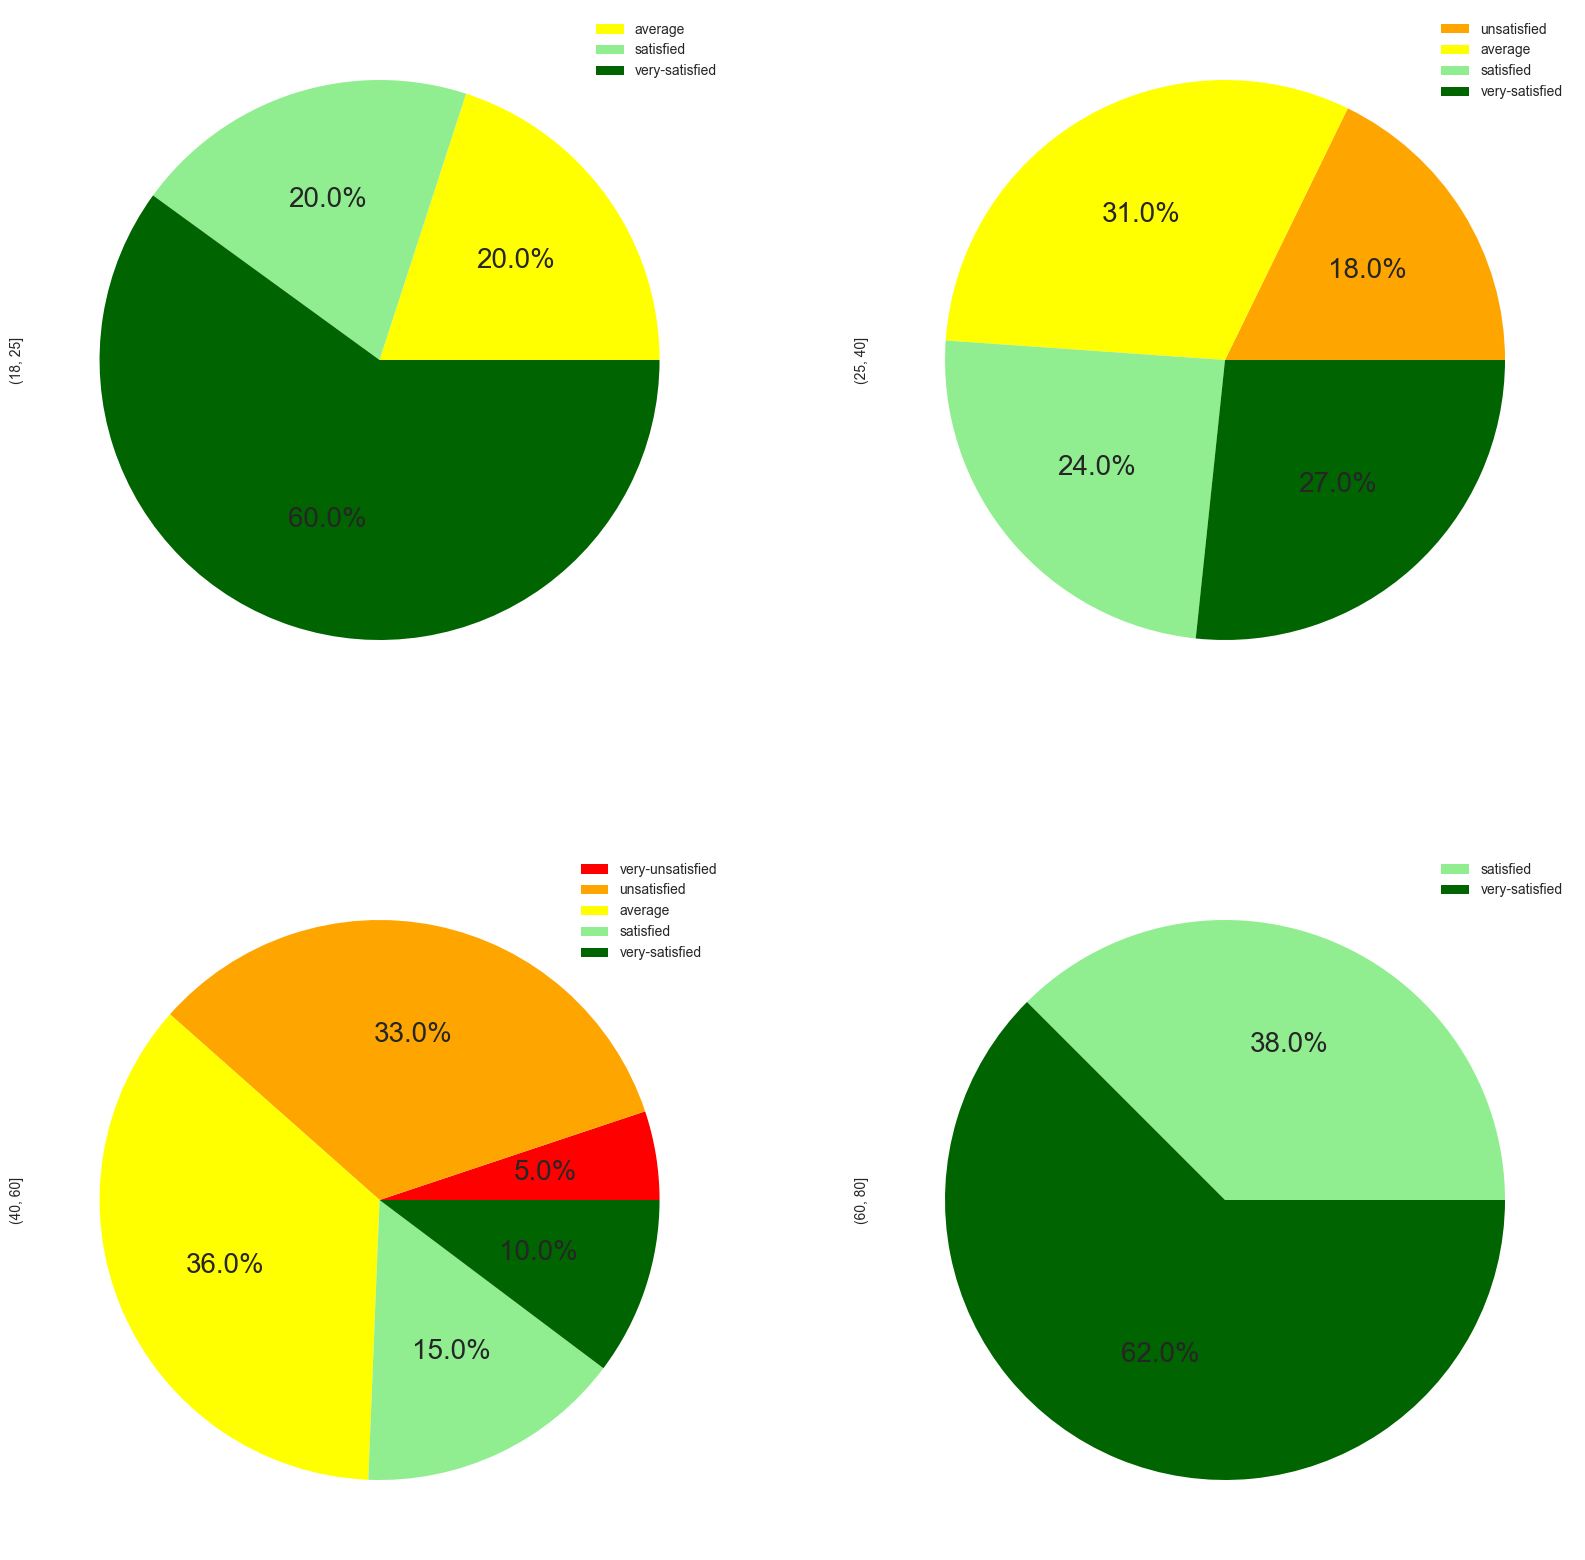

In [14]:
bins = [18, 25, 40, 60, 80, 100]
df['age_class'] = pd.cut(df['age'], bins=bins)
df9 = pd.crosstab(df['sat_product_range'], df['age_class'])
df9.index = ['very-unsatisfied','unsatisfied','average','satisfied','very-satisfied']
df9.plot.pie(subplots=True, layout=(2,2),figsize=(20, 20), colors =['red','orange','yellow','lightgreen','darkgreen'],autopct=lambda p: '{:.1f}%'.format(round(p)) if p > 0 else '', labeldistance=None, legend = True, fontsize = 20)




<AxesSubplot:>

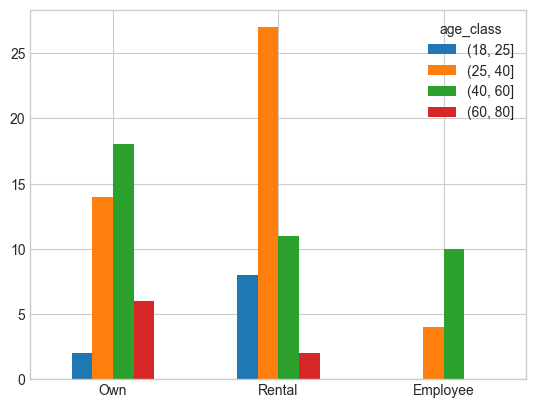

In [15]:
bins = [18, 25, 40, 60, 80, 100]
df['age_class'] = pd.cut(df['age'], bins=bins)
df1 = pd.crosstab(df['house'], df['age_class'])
df1.index = ['Own','Rental','Employee']
df1.plot.bar(rot = 0)

In [16]:
df = df.drop(['H', 'age', 'family_size', 'house', 'education', 'purchases', 'sat_product_range'], axis=1)

bins = [500,1000,2000,3000,4000,7000]
df['income_class'] = pd.cut(df['net_income'], bins = bins)
df3 = pd.crosstab(df['income_class'], 'Count')

df3.columns.name = ''

# Percentages
n = df3['Count'].sum()
df3['%'] = df3 / n * 100
df3

,Count,%
income_class,,
"(500, 1000]",6,6.0
"(1000, 2000]",34,34.0
"(2000, 3000]",36,36.0
"(3000, 4000]",17,17.0
"(4000, 7000]",7,7.0


Text(0, 0.5, '%, n=100')

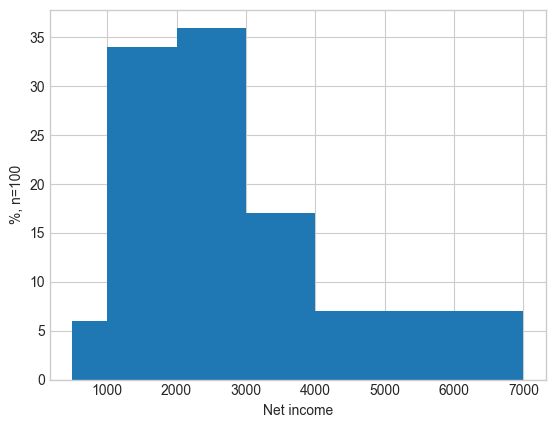

In [17]:

df['net_income'].hist(bins = bins, weights = np.ones(n) / n * 100)

plt.xlabel('Net income')
plt.ylabel('%, n=' + str(n))

In [18]:
df.nlargest(n = 1, columns = 'net_income')

,gender,net_income,sat_price_level,age_class,income_class
92,2,4850.0,4,"(40, 60]","(4000, 7000]"


In [19]:
df.nsmallest(n = 1, columns = 'net_income')

,gender,net_income,sat_price_level,age_class,income_class
65,1,770.0,2,"(18, 25]","(500, 1000]"
